In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
import pickle
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [2]:
# Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
#os.listdir("test_images/")
#https://view5639f7e7.udacity-student-workspaces.com/tree/CarND-Advanced-Lane-Lines/camera_cal


obj_points=[]
img_points=[]

#nx = 9#TODO: enter the number of inside corners in x
#ny = 6#TODO: enter the number of inside corners in y


fname = glob.glob(('camera_cal/calibration*.jpg'))

for nx in range(6,10):
    for ny in range (5,7):
        for image_name in fname:
            objp=np.zeros((ny*nx,3),np.float32)
            objp[:,:2]=np.mgrid[0:nx,0:ny].T.reshape(-1,2)

            img = cv2.imread(image_name)
            
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            image_2D_shape= gray.shape[::-1]

            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

            if ret == True:
                img_points.append(corners)
                obj_points.append(objp)    
                print("found for:",image_name)
            

'for nx in range(6,10):\n    for ny in range (5,7):\n        for image_name in fname:\n            objp=np.zeros((ny*nx,3),np.float32)\n            objp[:,:2]=np.mgrid[0:nx,0:ny].T.reshape(-1,2)\n\n            img = cv2.imread(image_name)\n            \n            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n            image_2D_shape= gray.shape[::-1]\n\n            # Find the chessboard corners\n            ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)\n\n            if ret == True:\n                img_points.append(corners)\n                obj_points.append(objp)    \n                print("found for:",image_name)\n            '

In [3]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, image_2D_shape, None, None)
with open('distortion.pickle', 'wb') as f:
    pickle.dump([mtx, dist], f)

NameError: name 'image_2D_shape' is not defined

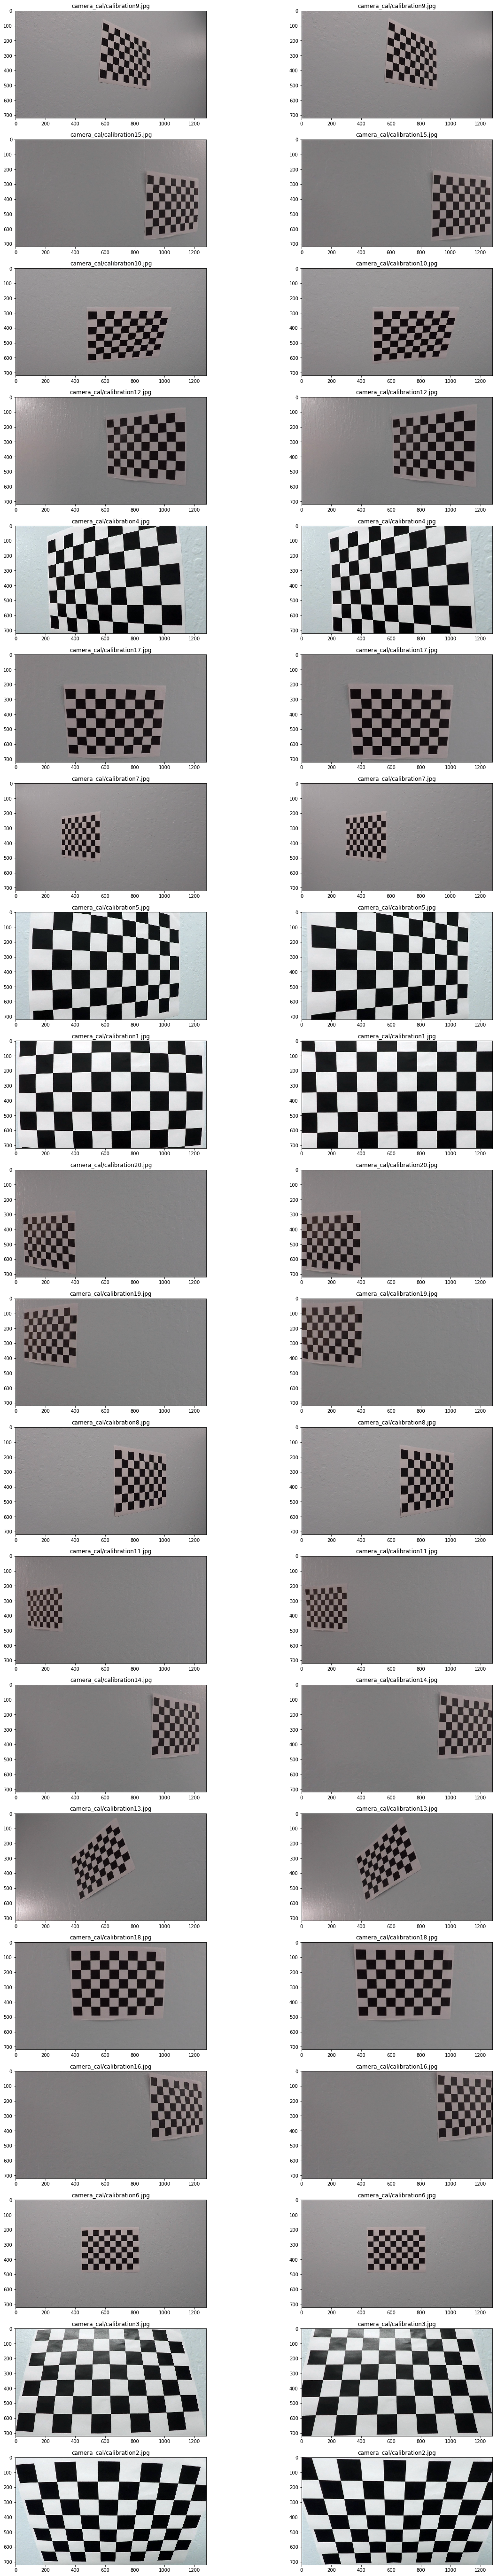

In [10]:
fname = glob.glob(('camera_cal/calibration*.jpg'))

fig=plt.figure(figsize=(20,100)) # for images before and after to display side by side 

with open('distortion.pickle', 'rb') as f:
    mtx_pickle, dist_pickle = pickle.load(f)
 

for idx,im in enumerate(fname):
    img = cv2.imread(im)
    undist = cv2.undistort(img, mtx_pickle, dist_pickle, None, mtx_pickle)
    
    ax0=fig.add_subplot(20,2,(2*idx)+1)
    ax1=fig.add_subplot(20,2,(2*idx)+2)
    
    ax0.set_title(im)    
    ax1.set_title(im)
    
    ax0.imshow(img, cmap='gray')
    ax1.imshow(undist, cmap='gray')




In [ ]:
cv2.putText(img,'Hack Projects',(10,500), font, 1,(255,255,255),2)

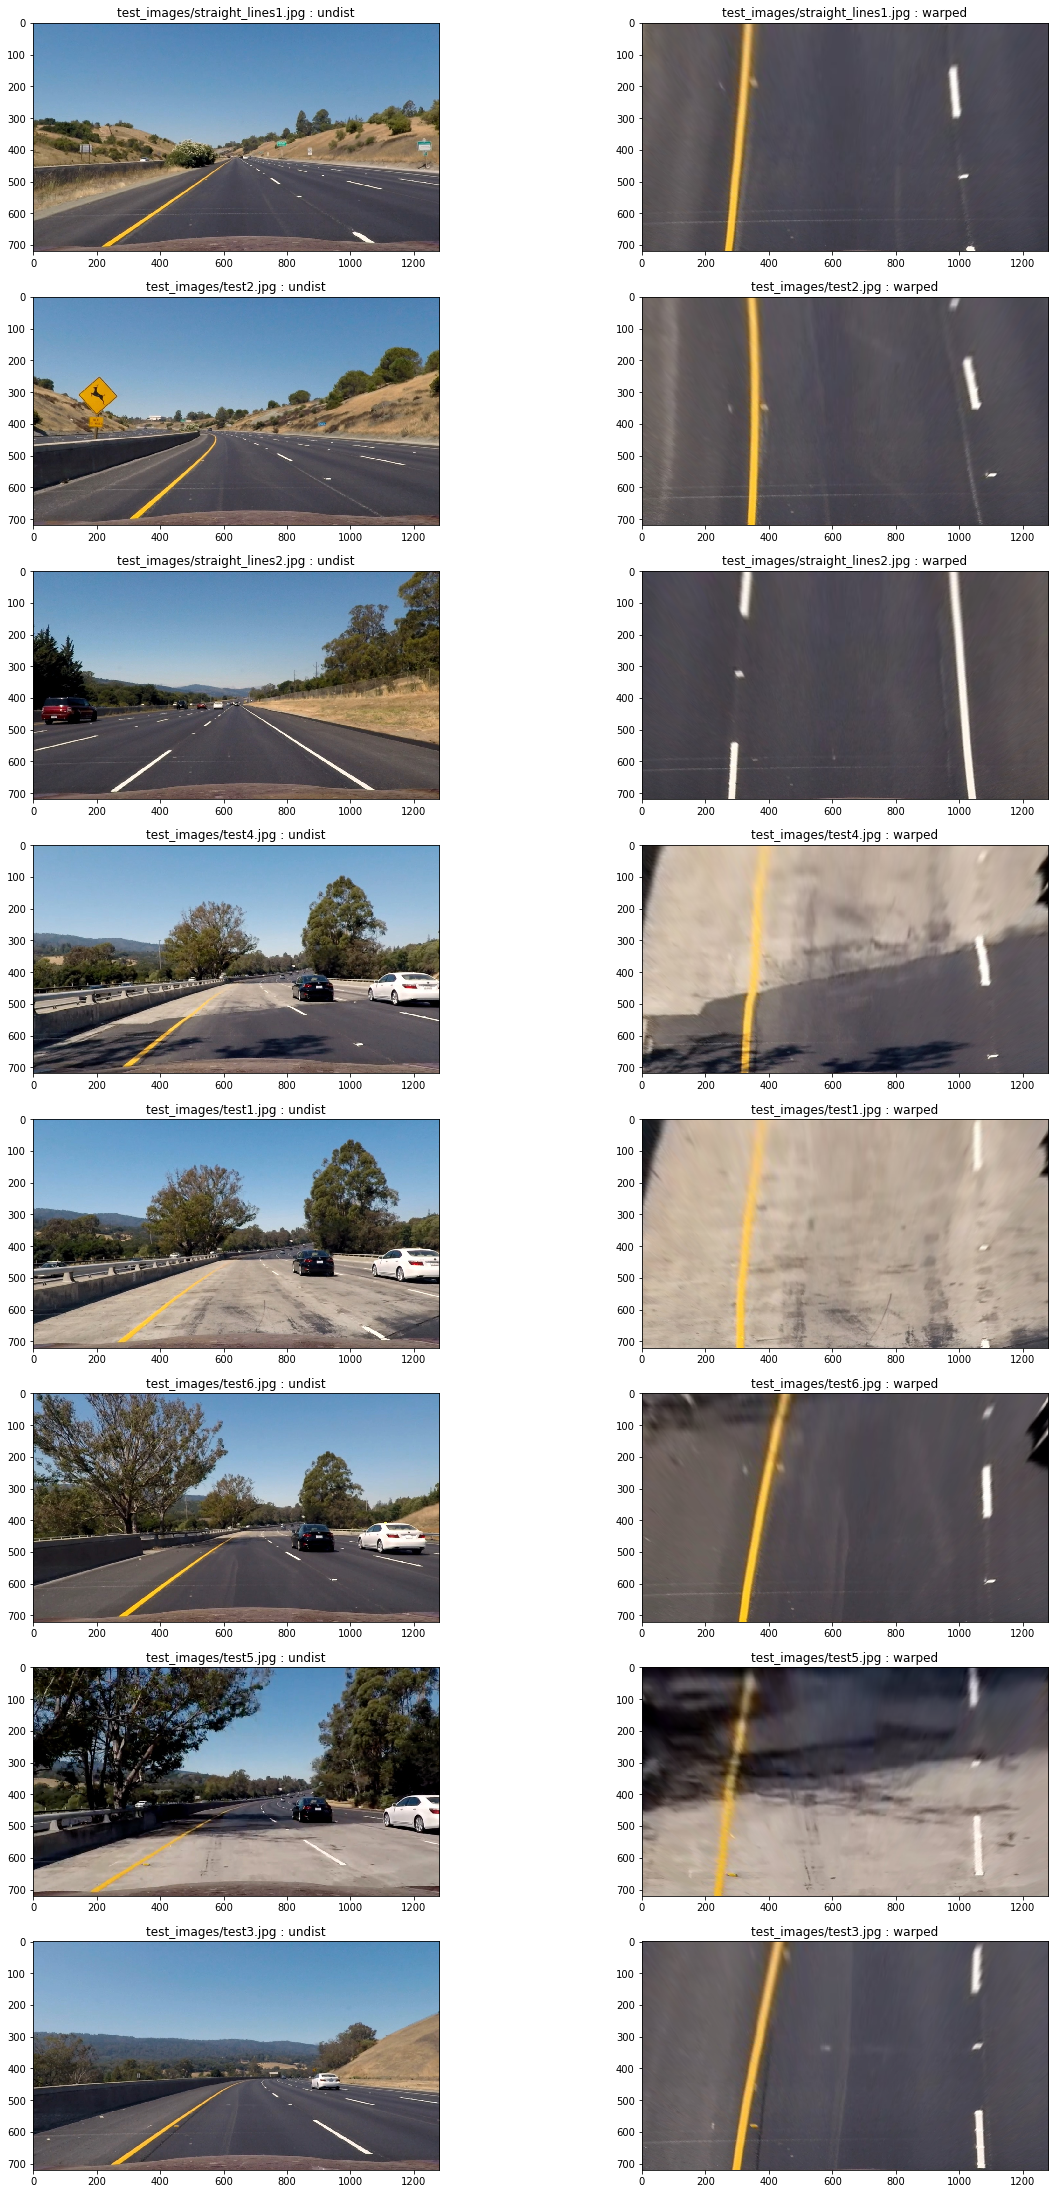

In [6]:
fname = glob.glob("test_images/*.*")

with open('distortion.pickle', 'rb') as f:
    mtx_pickle, dist_pickle = pickle.load(f)
 

fig=plt.figure(figsize=(20,100)) # for images before and after to display side by side 


src = np.float32([[581,477],[699,477],[896,675],[384,675]])

dst = np.float32([[384,0],[896,0],[896,720],[384,720]])

M_warp = cv2.getPerspectiveTransform(src, dst)

font = cv2.FONT_HERSHEY_SIMPLEX
#cv2.putText(undist,'Hack Projects',(200,100), font, 1,(255,255,255),2)
for idx,im in enumerate(fname):

    img = cv2.imread(im)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_size = (img.shape[1], img.shape[0])

    undist = cv2.undistort(img, mtx_pickle, dist_pickle, None, mtx_pickle)
    
    warped = cv2.warpPerspective(undist, M_warp, img_size)
    
    ax0=fig.add_subplot(20,2,(2*idx)+1)
    ax1=fig.add_subplot(20,2,(2*idx)+2)
    
    ax0.set_title(im+" : undist")    
    ax1.set_title(im+" : warped")
    
    ax0.imshow(undist, cmap='gray')
    ax1.imshow(warped, cmap='gray')


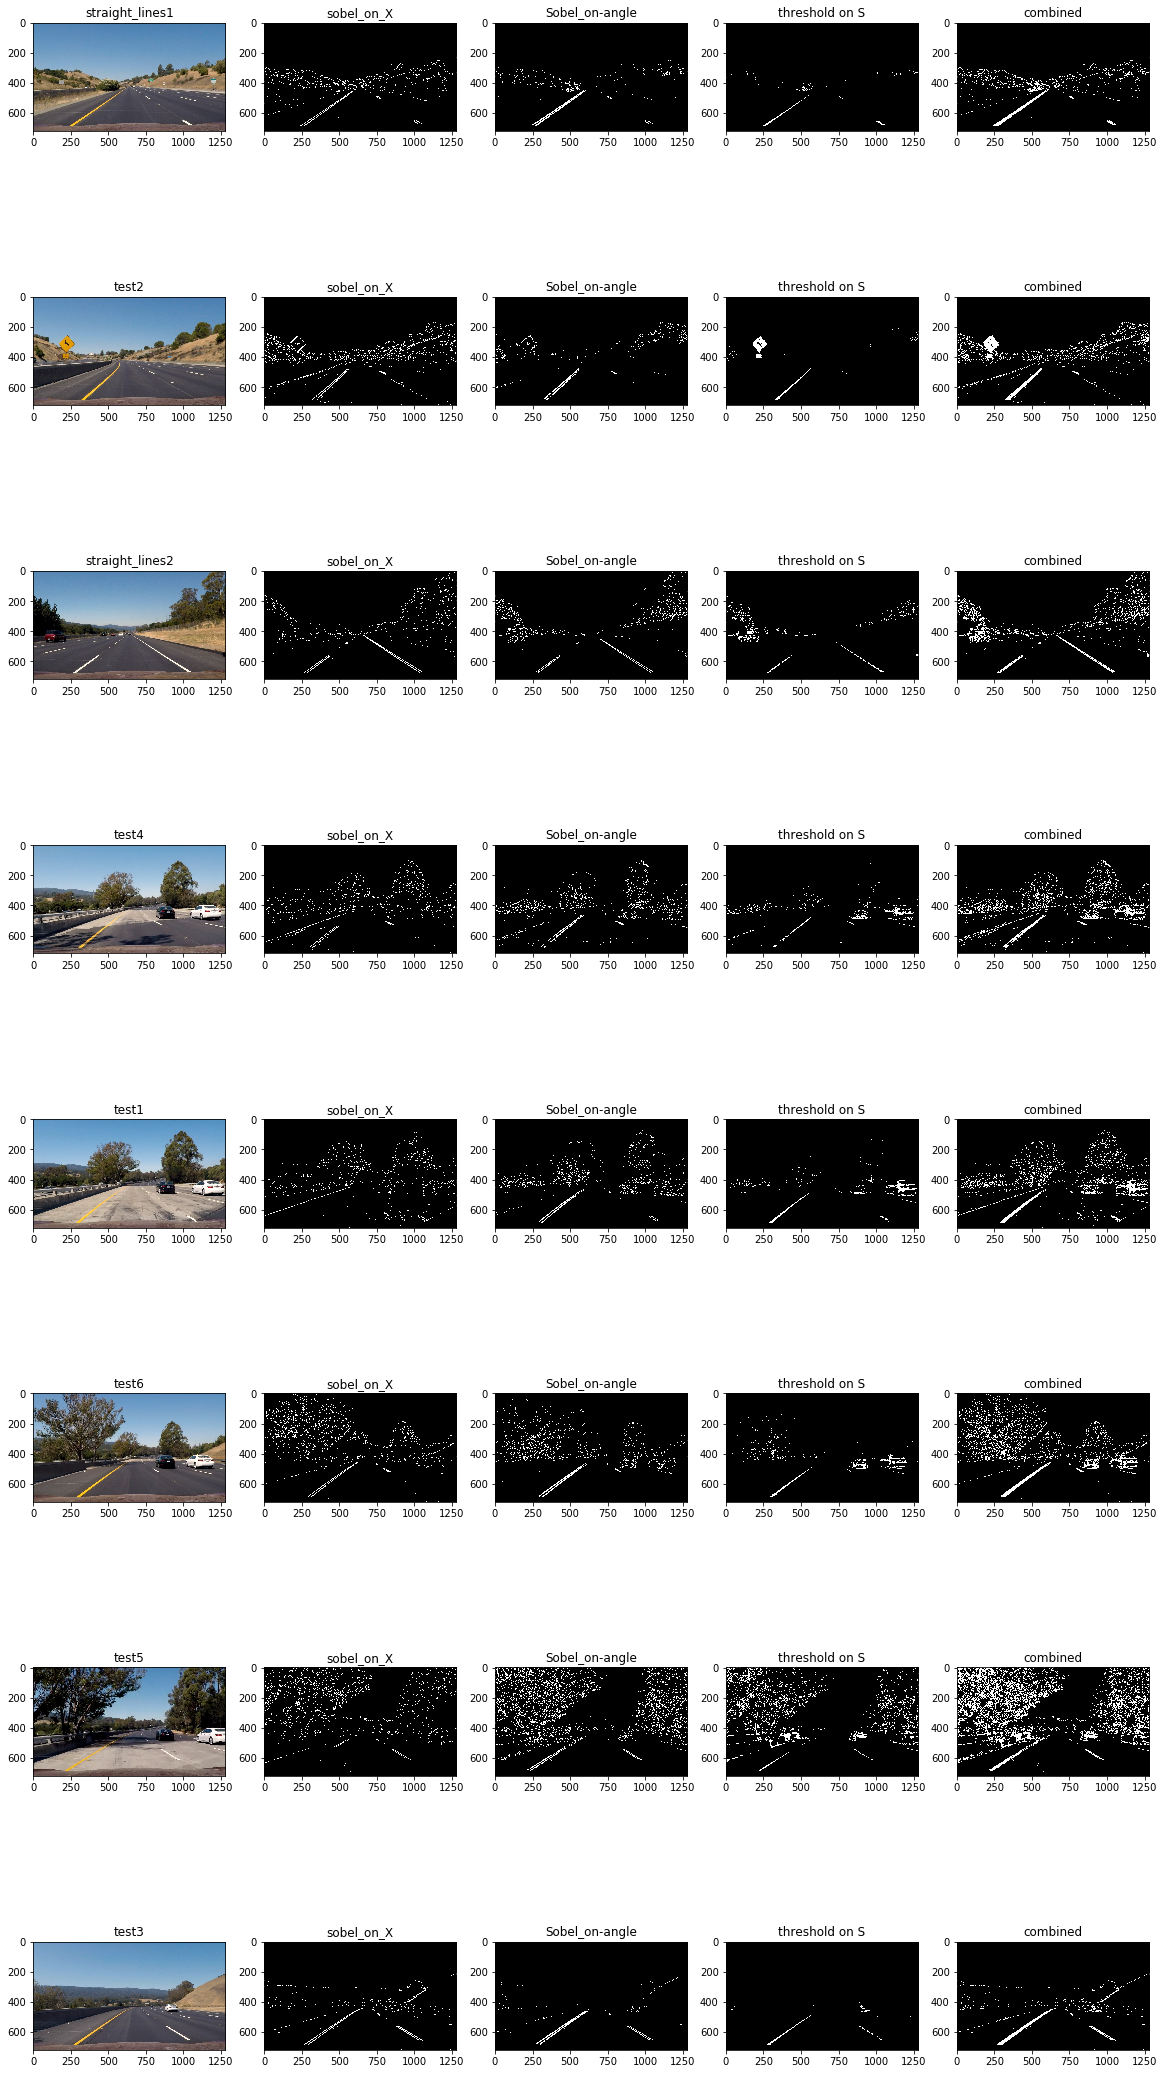

In [13]:
im_list=os.listdir("test_images/")

fig=plt.figure(figsize=(20,100)) # for images before and after to display side by side 


for idx,im in enumerate(im_list):
    im_title=im.replace(".jpg","")
    img=mpimg.imread('test_images/'+im)
    
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2] 
    
    img1= sobelx_dir_threshold(img, sobel_kernel=7, thresh=(0.7, 1.3))
    img2= S_sobelx_dir_threshold(S, sobel_kernel=7, thresh=(0.7, 1.3))    
    img3=np.zeros_like(S)
    img3[(S>200)]=1
    img4=np.zeros_like(S)
    img4[(img1==1)|(img2==1)|(img3==1)]=1
        
    img0_title=im_title
    img1_title="sobel_on_X"
    img2_title="Sobel_on-angle"   
    img3_title="threshold on S"
    img4_title="combined"


    #img2= cv2.undistort(img1, mtx, dist, None, mtx)
    #ax1=fig.add_subplot(20,2,(2*idx)+1)

    #ax1.imshow(img1)
    #ax1.imshow(img3)
    #ax2=fig.add_subplot(20,2,(2*idx)+2)
    ax0=fig.add_subplot(20,5,(5*idx)+1)
    ax1=fig.add_subplot(20,5,(5*idx)+2)
    ax2=fig.add_subplot(20,5,(5*idx)+3)
    ax3=fig.add_subplot(20,5,(5*idx)+4)
    ax4=fig.add_subplot(20,5,(5*idx)+5)
  
    ax0.set_title(img0_title)    
    ax1.set_title(img1_title)
    ax2.set_title(img2_title)
    ax3.set_title(img3_title)
    ax4.set_title(img4_title)
  
    ax0.imshow(img, cmap='gray')
    ax1.imshow(img1, cmap='gray')
    ax2.imshow(img2, cmap='gray')
    ax3.imshow(img3, cmap='gray')
    ax4.imshow(img4, cmap='gray')

        

In [ ]:
# finding 4 points coordinate in the picture : https://yangcha.github.io/iview/iview.html

In [18]:
  """FOR PROJECT ASSESSMENT : RUN ThiS CELL FIRST"""
    
    
    
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
import pickle
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from collections import deque




def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Take the absolute value of the x and y gradients
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image
    # Define a function to threshold an image for a given range and Sobel kernel
    # Grayscale
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0,ksize=sobel_kernel))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    sobelx[(scaled_sobel < 30) | (scaled_sobel > 200)] = 0

    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    return binary_output



def sobelx_dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    
    # 1) conversion to gray Grayscale for Sobel calculation
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2)  exclude low sobelx gradient points (since the lane is mostly vertical)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0,ksize=sobel_kernel))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    sobelx[(scaled_sobel < 20)] = 0
    
    # 3) calculate sobely:
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
  
    # 4) calculate the absolute value of the gradient direction, 
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    
    # apply an threshold (possible angle of the lane: kind ofsimilar to a polymask region of interest) 
    # and create a binary image 
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1


    return binary_output
    

def S_sobelx_dir_threshold(img, sobel_kernel=21, thresh=(0, np.pi/2)):
    
    
    # S is already a 2D , 8 bits 
    # 2)  exclude low sobelx gradient points (since the lane is mostly vertical)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    abs_sobel = np.absolute(cv2.Sobel(img, cv2.CV_64F, 1, 0,ksize=sobel_kernel))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    sobelx[(scaled_sobel < 20)] = 0
    
    # 3) calculate sobely:
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
   
    # 4) calculate the absolute value of the gradient direction, 
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    
    # apply an threshold (possible angle of the lane: kind ofsimilar to a polymask region of interest) 
    # and create a binary image 
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    return binary_output
    
#----------------------------------------------------------

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 20

    # Set height of windows based on nwindows above and image shape

    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
  
    
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]

        # explanation about inds: the indexes of the non zero points within nonzerox and nonzeroy
        # (P1,...,Pk): list of Pi <>0 
        # len(nonzerox)=len(nonzeroy)= len(nonzero[0], len(nonzero[1])
        # nonzerox=(x1,...,xk), nonzeroy=(y1,...,yk)
        # nonzero= (nonzerox, nonzeroy): so non zero points have the same index within nonzerox and nonzeroy
        #((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) verifies that the y coordinates of these nonzero points are within the window ywise,  same with (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high))
        # and the & only take the nonzero meeting these 2 requirements
        # then it zeros out the nonzero points not in this window (where these two conditions should be met)


        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    
    k=10# size of the averaging buffers
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)
    LW=Lane_Width_Bottom() # .ABC_current_fit
    #print("LW",LW)
    #print("-----------------------> USING FIND LANE--------------------------------")
    if (len(leftx)!=len(rightx)) : #and (len(leftx)>0) and (len(rightx)>0) : 
             
        # Fit new polynomials
        left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
      
        left_curverad, right_curverad = measure_curvature_pixels(ploty, Lft.ABC_current_fit, Rgt.ABC_current_fit,LW)
        
        if Lft.recent_radius==0:
            Lft_radius_increase = 0
        else :
            Lft_radius_increase = abs(int(100*(Lft.recent_radius-left_curverad)/left_curverad))
        
        if  Rgt.recent_radius==0:
            Rgt_radius_increase = 0 
        else: 
            Rgt_radius_increase=abs(int(100*(Rgt.recent_radius-right_curverad)/right_curverad))
        
        #print(Lft_radius_increase)
        #print(Rgt_radius_increase)
     
        if (len(leftx)>0) and (len(rightx)>0) : 
            
                    
            #print("using FIND LANE")
            #print (Lft.ABC_current_fit)
  
       
            Lft.current_xfitted=left_fitx 
            Rgt.current_xfitted=right_fitx       
            
            LW=Lane_Width_Bottom() # .ABC_current_fit
            #print("LW",LW)
            xm_per_pix = 3.7/700
            Lane_Width_Top= (Rgt.ABC_current_fit[2]-Lft.ABC_current_fit[2])*xm_per_pix # approximation good enough for its purpose
            #print("Offstet",Offstet(binary_warped))
            offset=Offstet(binary_warped,LW)
            #print("Lane_Width_Top",Lane_Width_Top)
        
            if (LW<6 and LW>3) and (Lane_Width_Top<6 and Lane_Width_Top>3):
                
                # good enough to update the vehicle position
       
                Lft.line_base_pos=offset
 
        
                Lft.ABC_n_recent_fit.append(Lft.ABC_current_fit)
                Rgt.ABC_n_recent_fit.append(Rgt.ABC_current_fit)
                
        
                # was the line detected in this iteration
                Lft.detected = True 
                Rgt.detected=True
       
                # UPDATE x values of the last n fits of the line(comes fron)
                Lft.n_recent_xfitted.append(Lft.current_xfitted)
                Rgt.n_recent_xfitted.append(Rgt.current_xfitted)
                
                #
                Lft.recent_radius = left_curverad
                Lft.n_radius.append(left_curverad)
                Rgt.recent_radius = right_curverad
                Rgt.n_radius.append(right_curverad)
                 
                #print(" using FIND LANE : ---> no problem")
            
            else:
                
                # lane width did not qualified in this iteration
                Lft.detected = False 
                Rgt.detected=False
   
                
                #print ("using FIND LANE : ---> lane detected but did not qualified WIDTH WISE")
            
            
        else: # meaning : not (len(leftx)>0) and (len(rightx)>0)
                
            if (len(leftx)>0): 
                Lft.ABC_n_recent_fit.append(Lft.ABC_current_fit)             
                Lft.detected = True 
                Lft.n_recent_xfitted.append(Lft.current_xfitted)
                #
                Lft.recent_radius = left_curverad
                Lft.n_radius.append(left_curverad)
                
                #print(" using FIND LANE : ---> only LEFT side detected")
                   
            if (len(rightx)>0):
                Rgt.ABC_n_recent_fit.append(Rgt.ABC_current_fit)
                Rgt.detected=True
                Rgt.n_recent_xfitted.append(Rgt.current_xfitted)
                #
                Rgt.recent_radius = right_curverad
                Rgt.n_radius.append(right_curverad)  
 

                #print(" using FIND LANE : ---> only RIGHT side detected")
             
            # one of the line was missing in this iteration
            Lft.detected = False 
            Rgt.detected=False
   
            
            
    else:
        # no line detected 
        
        
        #print("!!!!!!!!!!!!!!!!!!!SEARCH ARROUND NO LINE DEtECYED!!!!!!!!!!!!!!!!!!!")
        #print("len(leftx)",len(leftx))
        #print("len(rightx)", len(rightx))
        #print("leftx", leftx)
        print("rightx", rightx)
        # 
    
        
        print("using FIND LANE: no detection at all")
        # both lines were missing in this iteration
        Lft.detected = False 
        Rgt.detected=False
    
   
    # updating the average xfitted UPDATED or HISTORICAL 
    Lft.ABC_best_fit  = np.average(Lft.ABC_n_recent_fit [-k:], axis=0)
    Rgt.ABC_best_fit  = np.average(Rgt.ABC_n_recent_fit [-k:], axis=0)
  
    # outputting the average xfitted UPDATED or HISTORICAL                                
    Lft.bestx = np.average(Lft.n_recent_xfitted[-k:], axis=0)
    Rgt.bestx = np.average(Rgt.n_recent_xfitted[-k:], axis=0)
            
    left_fitx=Lft.bestx
    right_fitx=Rgt.bestx
    
    # outputting the average radius UPDATED or HISTORICAL 
    Lft.best_radius = int(np.average(Lft.n_radius[-2*k:], axis=0))
    Rgt.best_radius = int(np.average(Rgt.n_radius[-2*k:], axis=0))
  
    
    ploty = np.linspace(0, (binary_warped.shape[0])-1, binary_warped.shape[0])  
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    result=out_img
  
    
    return (result,[left_fitx,ploty], [right_fitx,ploty])


#---------------------------------------------------------------

def fit_poly(img_shape, leftx, lefty, rightx, righty):
     ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
 
   
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
        # starting from the image top (y=0) to the bottom, so a count of img_shape[0]points 

    if len(leftx)==0:
        left_fit=[]
        left_fitx=[]
    else:
        left_fit  = np.polyfit(lefty, leftx, 2) # left side: finds the A,B,C for a series of points  
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        Lft.ABC_current_fit  =left_fit
    
    if len(rightx)==0:
        right_fit=[]
        right_fitx=[]
       
    else:
        right_fit  = np.polyfit(righty, rightx, 2) # left side: finds the A,B,C for a series of points  
        Rgt.ABC_current_fit  =right_fit
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]


          
    #*********
    # right_fit or left_fit is either the one just calculated above if detected 
    # or the last one calculated ( this would ave to be the average once smoothed out)
   
    
   
    return left_fitx, right_fitx, ploty

def search_around_poly(binary_warped):
    
    k=10 # size if the averaging buffers
    
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 20

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ploty = np.linspace(0, (binary_warped.shape[0])-1, binary_warped.shape[0])  
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    
    
    left_fit=Lft.ABC_best_fit
    right_fit=Rgt.ABC_best_fit
    

    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    #print("len(leftx)",len(leftx))
    #print("len(rightx)",len(rightx))
    #print("len(lefty)",len(lefty))
    #print("len(righty)",len(righty))
    #print("just testing that lane Width is available")
    
   
    
    if (len(leftx)!=len(rightx)) : #and (len(leftx)>0) and (len(rightx)>0) : 
             
        # Fit new polynomials
        left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
        
        
        if (len(leftx)>0) and (len(rightx)>0) : 
                    
            #print ("------------------------------------------------search around------------")
       
            Lft.current_xfitted=left_fitx 
            Rgt.current_xfitted=right_fitx       
            
            LW=Lane_Width_Bottom() # .ABC_current_fit
            
            xm_per_pix = 3.7/700
            Lane_Width_Top= (Rgt.ABC_current_fit[2]-Lft.ABC_current_fit[2])*xm_per_pix
            #print("Lane_Width_Top",Lane_Width_Top)
            #print (Lft.ABC_current_fit)
            offset=Offstet(binary_warped,LW)
            #print("Offstet",Offstet(binary_warped))
        
            if (LW<6 and LW>3) and (Lane_Width_Top<6 and Lane_Width_Top>3) :
            
                # good enough to update the vehicle position
       
                Lft.line_base_pos=offset
        
                left_curverad, right_curverad= measure_curvature_pixels(ploty, Lft.ABC_current_fit, Rgt.ABC_current_fit,LW )

                Lft_radius_increase=abs(int(100*(Lft.recent_radius-left_curverad)/left_curverad))
               
                Rgt_radius_increase=abs(int(100*(Rgt.recent_radius-right_curverad)/right_curverad))
                
                #print("Lft_radius_%_variation",(Lft_radius_increase))
                #print("Rgt_radius_%_variation",(Rgt_radius_increase))
                
                # UPDATE x values of the last n fits of the line
                if Lft_radius_increase<100:
                    
                    
                    Lft.ABC_n_recent_fit.append(Lft.ABC_current_fit)
                    Lft.n_recent_xfitted.append(Lft.current_xfitted)
                    Lft.recent_radius = left_curverad
                    Lft.n_radius.append(left_curverad)
                    Lft.detected = True
                
                else:
                    Lft.detected = False 
                    #print ("excessive LEFT radius VARIATION")
                    
            

                if Rgt_radius_increase<100:
                     
                    Rgt.ABC_n_recent_fit.append(Rgt.ABC_current_fit)
                    Rgt.n_recent_xfitted.append(Rgt.current_xfitted)
                    Rgt.recent_radius = right_curverad
                    Rgt.n_radius.append(right_curverad)
                    Rgt.detected = True
                
                else :
                    
                    Rgt.detected=False
                    #print ("excessive RIGHT radius VARIATION")


  
            
            else:
                
                # right and left line were detected but not qualifying (distance wise) in this iteration
                Lft.detected = False 
                Rgt.detected=False
        
                #print("---------------> using SEARCH ARROUND : lane was too NARROW or too WIDE : switch to FIND LANE")
         
            
        else: # meaning : not (len(leftx)>0) and (len(rightx)>0): one of the line is detected 
            
            LW=Lane_Width_Bottom()
            left_curverad, right_curverad= measure_curvature_pixels(ploty, Lft.ABC_current_fit, Rgt.ABC_current_fit ,LW)

            Lft_radius_increase=abs(int(100*(Lft.recent_radius-left_curverad)/left_curverad))
               
            Rgt_radius_increase=abs(int(100*(Rgt.recent_radius-right_curverad)/right_curverad))
          
            if (len(leftx)>0): 
                
                if Lft_radius_increase<100:
                    
                    Lft.ABC_n_recent_fit.append(Lft.ABC_current_fit)
                    Lft.n_recent_xfitted.append(Lft.current_xfitted)
                    Lft.recent_radius = left_curverad
                    Lft.n_radius.append(left_curverad)
                    Lft.detected = True
                
                else:
                    
                    Lft.detected = False 
                    #print ("excessive LEFT radius VARIATION")
                    
           
            if (len(rightx)>0):
                
                if Rgt_radius_increase<100:
                                        
                    Rgt.ABC_n_recent_fit.append(Rgt.ABC_current_fit)
                    Rgt.n_recent_xfitted.append(Rgt.current_xfitted)
                    Rgt.recent_radius = right_curverad
                    Rgt.n_radius.append(right_curverad)
                    Rgt.detected = True
                    #print("---------------> using SEARCH ARROUND updating LEFT side, RIGHT missing")
                 
                else:
                    
                    Lft.detected = False 
                    #print ("excessive RIGHT radius VARIATION")
                      
    else:
        # no line detected 
        
        
        print("!!!!!!!!!!!!!!!!!!!SEARCH ARROUND NO LINE DEtECYED!!!!!!!!!!!!!!!!!!!")
        print("**********ERROR**********")
        # both lines were missing in this iteration
        Lft.detected = False 
        Rgt.detected=False
    
  
    # updating the average xfitted UPDATED or HISTORICAL ( in other words if no update was done previous averages are used )
   
    Lft.ABC_best_fit  = np.average(Lft.ABC_n_recent_fit [-k:], axis=0)
    Rgt.ABC_best_fit  = np.average(Rgt.ABC_n_recent_fit [-k:], axis=0)
  
    # outputting the average xfitted UPDATED or HISTORICAL                                
    Lft.bestx = np.average(Lft.n_recent_xfitted[-k:], axis=0)
    Rgt.bestx = np.average(Rgt.n_recent_xfitted[-k:], axis=0)
            
    left_fitx=Lft.bestx
    right_fitx=Rgt.bestx
    
    # outputting the average radius UPDATED or HISTORICAL 
    Lft.best_radius = int(np.average(Lft.n_radius[-2*k:], axis=0))
    Rgt.best_radius = int(np.average(Rgt.n_radius[-2*k:], axis=0))
    
    
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    result=out_img
  
    
    return (result,[left_fitx,ploty], [right_fitx,ploty])

#------------------------------------------------------------------------

# DRAW UNWARPED LANE:
# add the list of points " [left_fitx, ploty])" and "[right_fitx, ploty])" to draw the lane on 
# a blank warped image and than unwarped for display on the origininal undistorded image  
# display warped image, and 
# Create an image to draw the lines on:

def draw_unwarped_lane(L,R,undist,warped,Minv):
    warp_zero = np.zeros_like(warped[:,:,0]).astype(np.uint8)
    #warp_zero = np.zeros_like(undist[0,1]).astype(np.uint8)
   
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack(L))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack(R)))])

    #pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    #pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
  
    cv2.fillPoly(color_warp, np.int_([pts]), (0,0, 255))
         
                          

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (undist.shape[1], undist.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    return(result)


#### SOBEL RAN ON A INDISTORTED AND WARPED IMAGE
### using see_arround once first lane found
def process_1_image(image):

        ##### REMOVE CAMERA DISTORTION-----------------------------------

    #img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    img=image
    img_size = (img.shape[1], img.shape[0])
    undistorted = cv2.undistort(img, mtx_pickle, dist_pickle, None, mtx_pickle)

    ##### PERPECTIVE RECTIFICATION-----------------------------------
    
    warped = cv2.warpPerspective(undistorted, M_warp, img_size)
     
    ##### SEVERAL SOBEL BASE & THRESHOLD FILTERINGS-----------------
    
    hls = cv2.cvtColor(warped, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]  
    img2= S_sobelx_dir_threshold(S, sobel_kernel=3, thresh=(0.7, 1.3))    
    img3=np.zeros_like(S)
    img3[(S>150)]=1
    img4=np.zeros_like(S)
    img4[(img2==1)|(img3==1)]=1
    
    
    if not(Lft.detected) or not(Rgt.detected) :   
        F_P=fit_polynomial(img4)
        
    else:
        F_P=search_around_poly(img4)
        

    

    img5=F_P[0]
    
    ##### PERPECTIVE RECTIFICATION-----------------------------------
   
    img6=draw_unwarped_lane(F_P[1],F_P[2],undistorted,warped,M_unwarp)
    
    Left= 'Left Radius : '+str(Lft.best_radius)+ " m "
    Right= 'Right Radius : '+str(Rgt.best_radius)+" m " 
    Position= "Position : " + str(Lft.line_base_pos)+" m " 
  
    cv2.putText(img6,Left,(75,75), font, 1,(255,0,0),2)
    cv2.putText(img6,Position,(75,125), font, 1,(0,0,0),2)
    cv2.putText(img6,Right,(75,175), font, 1,(0,255,0),2)

    #cv2.putText(img6,Right,(200,800), font, 1,(0,255,0),2)
        
    return(img6)

def Lane_Width_Bottom():
    # calculate lane width top of the image 
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    left_fitx=Lft.current_xfitted 
    right_fitx=Rgt.current_xfitted 
    LWB=(right_fitx[-1]-left_fitx[-1])*xm_per_pix
    #print("LANE WIDTH BOTTOM", LWB)
    return (LWB)

def Offstet(image,LW):
    # calculate lane width top of the image in meters
    
    #xm_per_pix = 3.7/700 # meters per pixel in x dimension
    xm_per_pix = LW/700 # meters per pixel in x dimension ( dynamic evaluation to account for the fluctuations of lane width arround 3.7 meters)
   
    left_fitx=Lft.current_xfitted 
    right_fitx=Rgt.current_xfitted 

    offset=round((image.shape[1]-(right_fitx[-1]+left_fitx[-1]))*xm_per_pix/2,1)

    #print("offset",offset)
    return (offset)
               

def measure_curvature_pixels(ploty, left_fit, right_fit,LW ):
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    # Start by generating our fake example data
    # Make sure to feed in your real data instead in your project!

    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    # Calculation of R_curve (radius of curvature)
    ym_per_pix = 30/720 # meters per pixel in y dimension
    #xm_per_pix = 3.7/700 # meters per pixel in x dimension
    xm_per_pix = LW/700 # meters per pixel in x dimension: dynamic evaluation
    
    coeff=(( ym_per_pix  **-2)+ (xm_per_pix **-2))**-0.5
    
    if len(left_fit)!=0:
        left_curverad = int(((1 + (2*left_fit[0]*y_eval*ym_per_pix + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0]))
       
    else:
        left_curverad=0
    
    if len(right_fit)!=0:
        right_curverad = int(((1 + (2*right_fit[0]*y_eval*ym_per_pix + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0]))
    else:
        right_curverad =0

    
    #print("left_curverad",int(left_curverad),"right_curverad",int(right_curverad) )
    return left_curverad, right_curverad


def Init_Param(fifo_length=10):
    
      ##### REMOVE CAMERA DISTORTION PARAMETERS-----------------------------------
    global mtx_pickle, dist_pickle 
    with open('distortion.pickle', 'rb') as f:
        mtx_pickle, dist_pickle = pickle.load(f)
    #undistorted = cv2.undistort(img, mtx_pickle, dist_pickle, None, mtx_pickle)
    
    ##### PERPECTIVE RECTIFICATION-----------------------------------
    src = np.float32([[941,720],[339,720],[600,457],[679,457]])
    dst = np.float32([[896,720],[384,720],[384,0],[896,0]])

    global M_warp , M_unwarp

    M_warp = cv2.getPerspectiveTransform(src, dst)
    M_unwarp = cv2.getPerspectiveTransform(dst,src)
    
    global L_F , R_F

    class PolyParam():
    
        """stores the polynomial factors in a second degree linear regression
        """   
    
        def __init__(self,abc):
            self.abc=abc
        
    
    L_F=PolyParam([0,0,0]) 
    R_F=PolyParam([0,0,0])
    
    global Lft , Rgt

    global  font 
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    class Line():
        
        def __init__(self):
            # was the line detected in the last iteration?
            # PROBABLY TO TRIGGER SEARCH ARROUND, AND TO KEEP DOING MAIN SEARCH AS LONG AS NOT FOUND IN MAINSEARCH
            self.detected = False 
            
            #X VALUES =================================
            
            # x values of the last n fits of the line
            # WILL BE UPDATED ONCE DETECTED PASS TESTS :  Lft.recent_xfitted.append(left_fitx)
            self.n_recent_xfitted = []  
            
            # average x values of the fitted line over the last n iterations: 
            # WILL BE UPDATED RECALCULATED ONCE DETECTED PASS TESTS : Lft.bestx = np.average(Lft.recent_xfitted[-10:], axis=0)
            self.bestx = None 
            
            # x for the most recent fit
            # WILL BE UPDATED ONCE DETECTED PASS TESTS 
            self.current_xfitted = [np.array([False])]  

            # polynomial coefficients of the last n fits of the line
            # WILL BE UPDATED ONCE DETECTED PASS TESTS :  Lft.recent_fit.append(lleft_fit)
            self.recent_fit = [] 
                    
            # polynomial coefficients averaged over the last n iterations
            # WILL BE UPDATED RECALCULATED ONCE DETECTED PASS TESTS : Lft.best_fit  = np.average(Lft.best_fit[-10:], axis=0)
            self.best_fit = None 
            
            
            # pynomial coefficients ABC ==============

                # polynomial coefficients for the most recent fit
                # WILL BE UPDATED ONCE DETECTED PASS TESTS :  Lft.current_fit=Lft.recent_fit[-1]
            #self.ABC_n_recent_fit = [np.array([False])]  
            self.ABC_n_recent_fit = []
                # polynomial coefficients averaged over the last n iterations
                # WILL BE UPDATED RECALCULATED ONCE DETECTED PASS TESTS : Lft.best_fit  = 		np.average(self.ABC_n_recent_fit [-10:], axis=0)
            self.ABC_best_fit = None 
            
                # polynomial coefficients for the most recent fit
            self.ABC_current_fit = [np.array([False])]  
                
     
      
            # radius values of the last n fits of the line
            # WILL BE UPDATED ONCE DETECTED PASS TESTS :  Lft.recent_radius.append(left_curverad)
            self.recent_radius = 0 
            
            # radius values average over the last n fits of the line
            # WILL BE UPDATED ONCE DETECTED PASS TESTS :  Lft.best_radius= average(Lft.recent_radius[-10:], axis=0)
            self.n_radius = [] 
            #radius of curvature of the line in some units
            self.best_radius = None 
    
            #distance in meters of vehicle center from the line
            self.line_base_pos = None 
     
    Lft=Line()
    Rgt=Line()

In [19]:
  """FOR PROJECT ASSESSMENT : RUN ThiS CELL AFTER RUNNING PREVIOUS CELL"""




project_output = 'project_video_OUTPUT.mp4'

Init_Param(10)

clip2 = VideoFileClip("project_video.mp4")

yellow_clip = clip2.fl_image(process_1_image)#.subclip(1,5) #NOTE: this function expects color images!!

%time yellow_clip.write_videofile(project_output, audio=False)


[MoviePy] >>>> Building video project_video_OUTPUT.mp4
[MoviePy] Writing video project_video_OUTPUT.mp4



 24%|██▍       | 303/1261 [01:03<03:30,  4.55it/s]


 48%|████▊     | 605/1261 [02:11<02:48,  3.89it/s]


 72%|███████▏  | 907/1261 [03:19<01:19,  4.48it/s]


 96%|█████████▌| 1206/1261 [04:27<00:12,  4.42it/s]


100%|█████████▉| 1260/1261 [04:40<00:00,  4.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_OUTPUT.mp4 

CPU times: user 2min 14s, sys: 21.8 s, total: 2min 36s
Wall time: 4min 43s


In [20]:

project_output = 'project_video_OUTPUT.mp4'
print(project_output)
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output))



project_video_OUTPUT.mp4
